In [12]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(readxl)
library(GGally)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [13]:
url <- "https://raw.githubusercontent.com/FarrelRamdhani/DSCI-100-Team-Project/blasius/Pumpkin_Seeds_Dataset.csv"
pumpkin_data <- read_csv(url)

pumpkin_data

Rows: 2500 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Class
dbl (12): Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi


In [14]:
set.seed(2023)

In [15]:
#dummy cols, will give random value for every class, but balance
dummy_cols <- tibble(value = (rnorm(mean = 10, sd = 8, n = nrow(pumpkin_data))))
dummy_cols

value
<dbl>
9.329725
2.136450
-5.000539
⋮
3.001725
15.436683
-7.800454


In [16]:
pumpkin_bind <- bind_cols(pumpkin_data, dummy_cols)
pumpkin_bind

Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,9.329725
76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,2.136450
71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,-5.000539
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi,3.001725
80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi,15.436683
84934,1159.933,462.8951,234.5597,85781,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,Ürgüp Sivrisi,-7.800454


In [17]:
plot_Area <- ggplot(pumpkin_bind, aes(x = value, y = Area, color = Class)) +
                geom_point() +
                labs(x = "Dist", y = "Area", color = "Class")


plot_Perimeter <- ggplot(pumpkin_bind, aes(x = value, y = Perimeter, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Perimeter", color = "Class")


plot_Major <- ggplot(pumpkin_bind, aes(x = value, y = Major_Axis_Length, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Major", color = "Class")


plot_Minor <- ggplot(pumpkin_bind, aes(x = value, y = Minor_Axis_Length, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Minor", color = "Class")


plot_Convex_Area <- ggplot(pumpkin_bind, aes(x = value, y = Convex_Area, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Convex Area", color = "Class")


plot_Equiv_Diameter <- ggplot(pumpkin_bind, aes(x = value, y = Equiv_Diameter, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Equiv Diameter", color = "Class")


plot_Eccentricity <- ggplot(pumpkin_bind, aes(x = value, y = Eccentricity, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Eccentricity", color = "Class")


plot_Solidity <- ggplot(pumpkin_bind, aes(x = value, y = Solidity, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Solidity", color = "Class")


plot_Extent <- ggplot(pumpkin_bind, aes(x = value, y = Extent, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Extent", color = "Class")


plot_Roundness <- ggplot(pumpkin_bind, aes(x = value, y = Roundness, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Roundness", color = "Class")


plot_Aspect_Ration <- ggplot(pumpkin_bind, aes(x = value, y = Aspect_Ration, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Aspect Ration", color = "Class")


plot_Compactness <- ggplot(pumpkin_bind, aes(x = value, y = Compactness, color = Class)) +
                geom_point() +
                labs(x = "value", y = "Compactness", color = "Class")

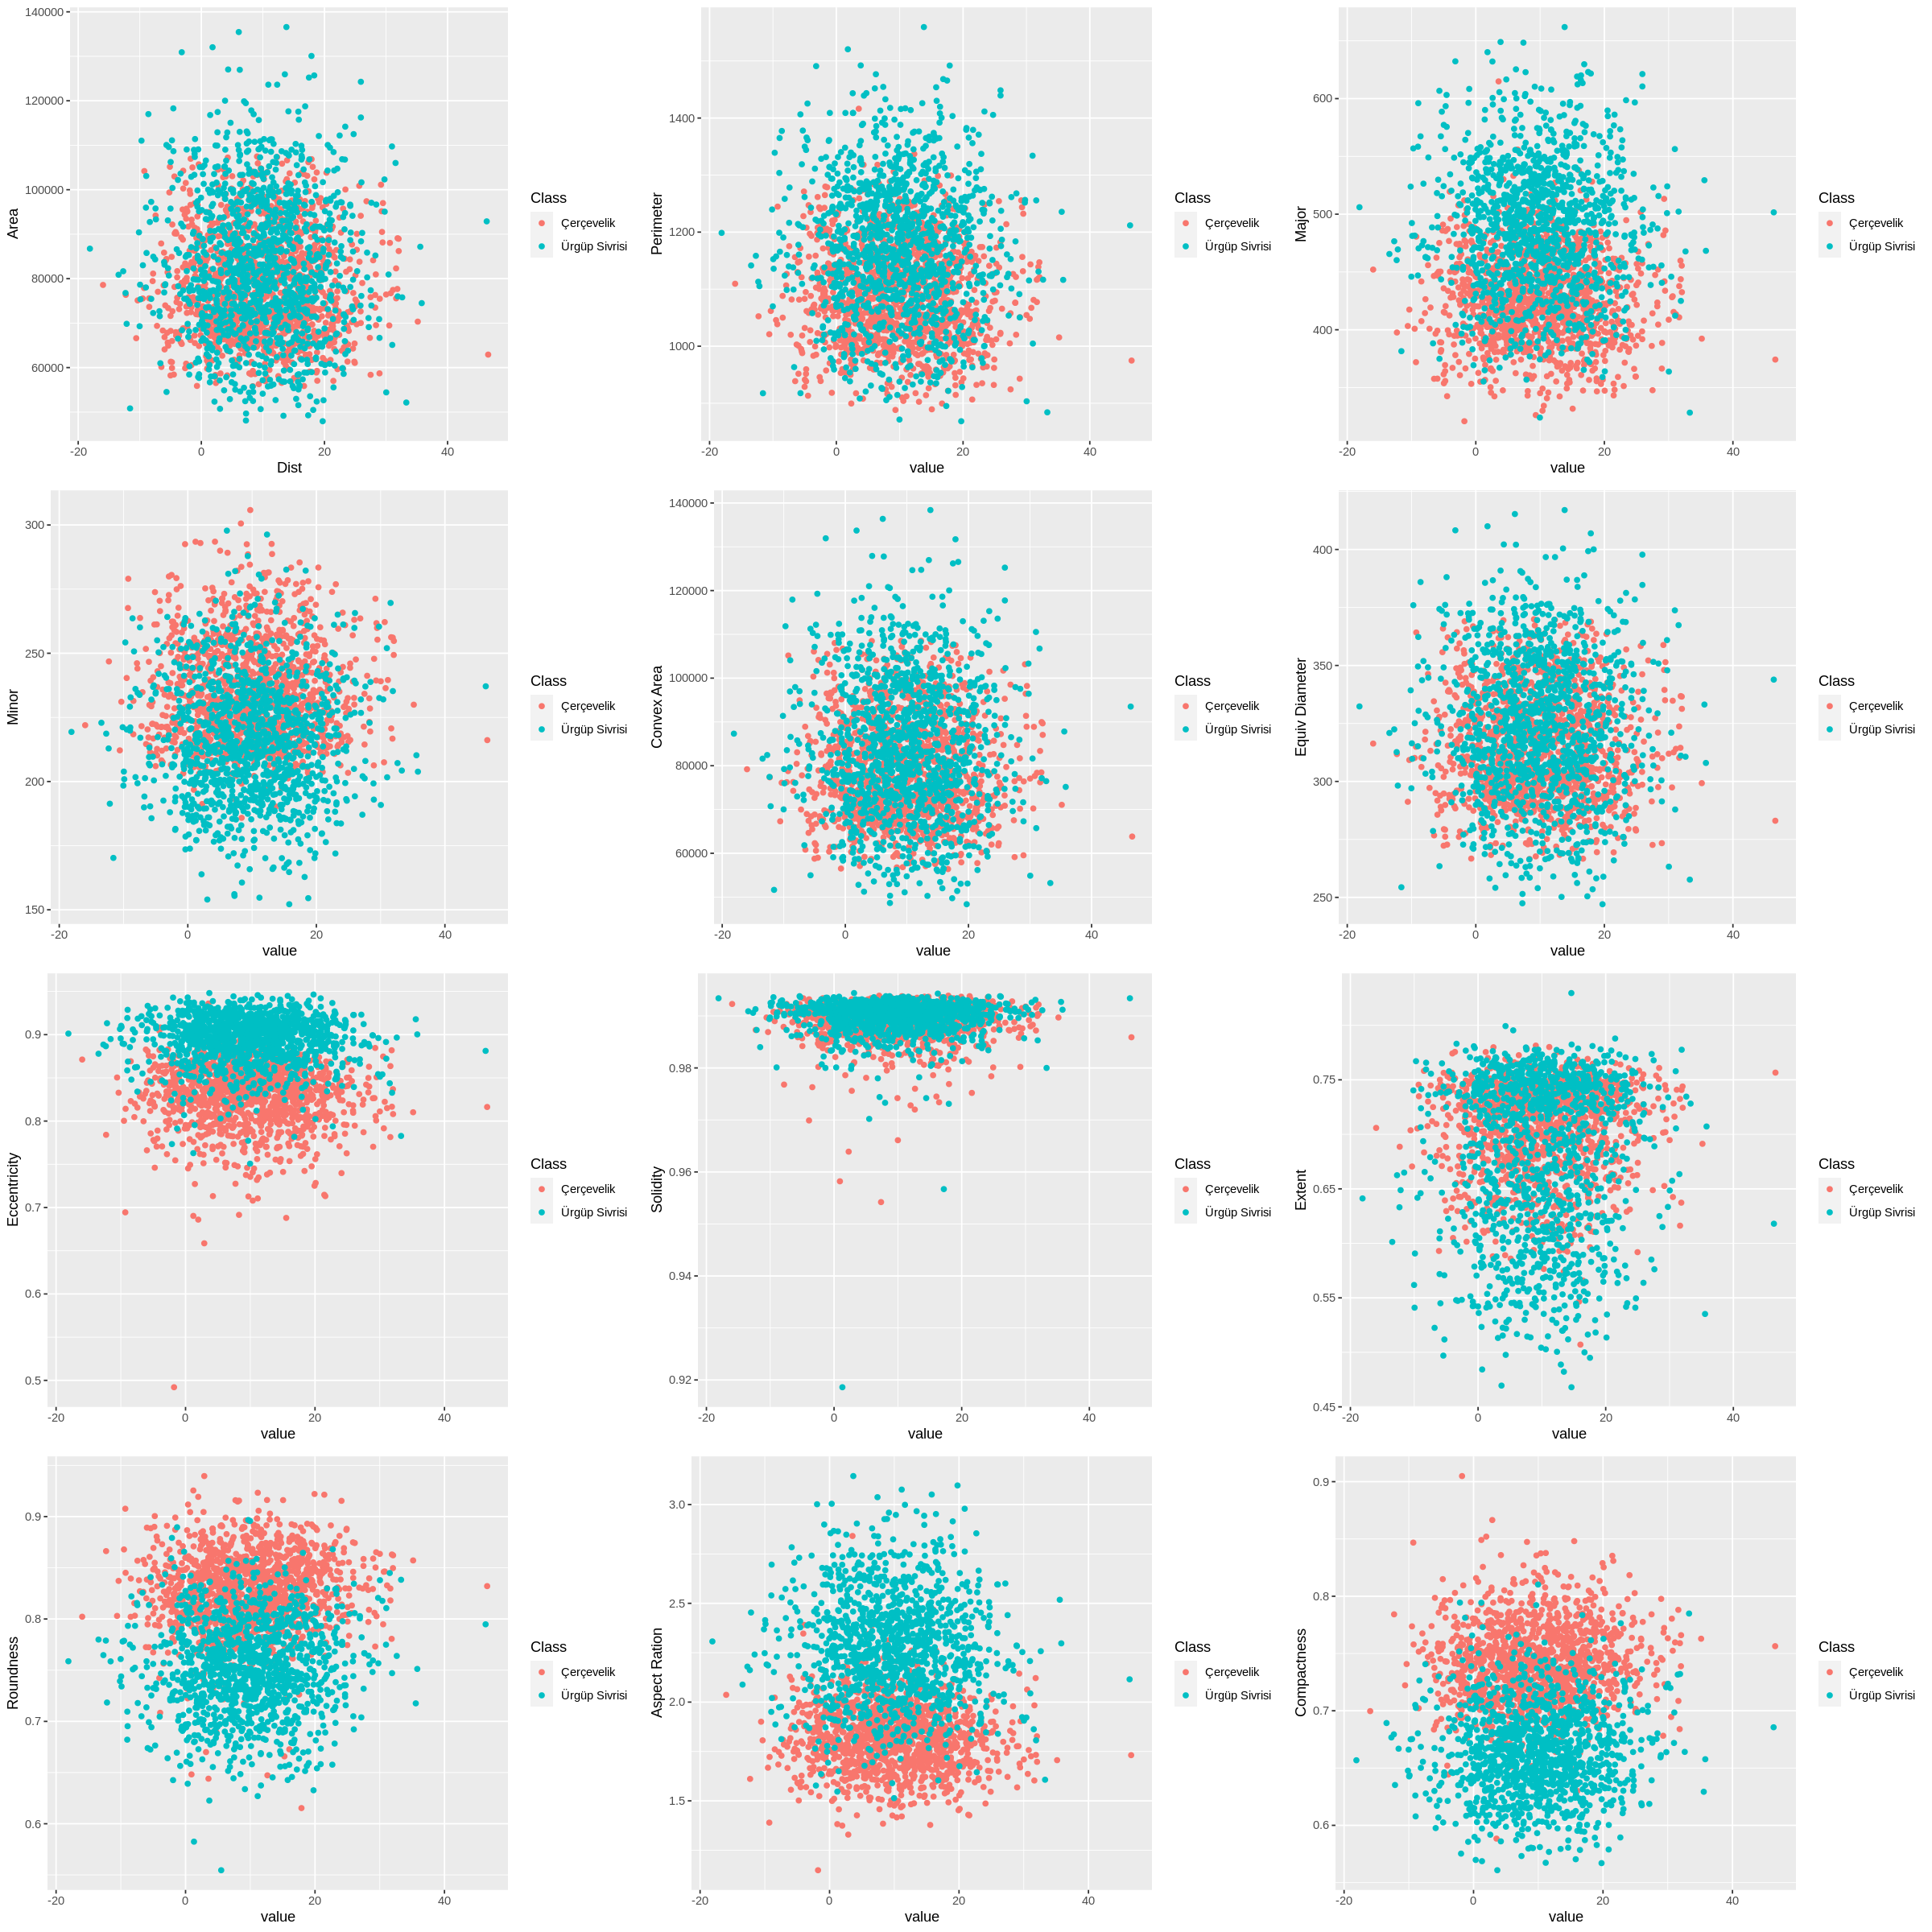

In [18]:
#Check here, if the value between blue and red create a cluster, it will be useful to use the parameters as it means the value for these 2 clases is different. 
#With different value for each class, the KNN can show a better performance as the different between distance is can be determined easily

options(repr.plot.width = 20, repr.plot.height = 20)
Plot_All <- plot_grid(plot_Area, plot_Perimeter, plot_Major, plot_Minor, plot_Convex_Area, plot_Equiv_Diameter, plot_Eccentricity, plot_Solidity,
         plot_Extent, plot_Roundness, plot_Aspect_Ration, plot_Compactness, ncol = 3)

Plot_All

In [19]:
# From the plot above, it can be seen that Eccentricity, Roundness, Aspect_Ration, and Compactness show a really contrast value between thesde 2 clases.
#Can be concluded that the use of these 4 parameteres will be useful.
#In addition Major And Minor Axis, shows a weak difference.

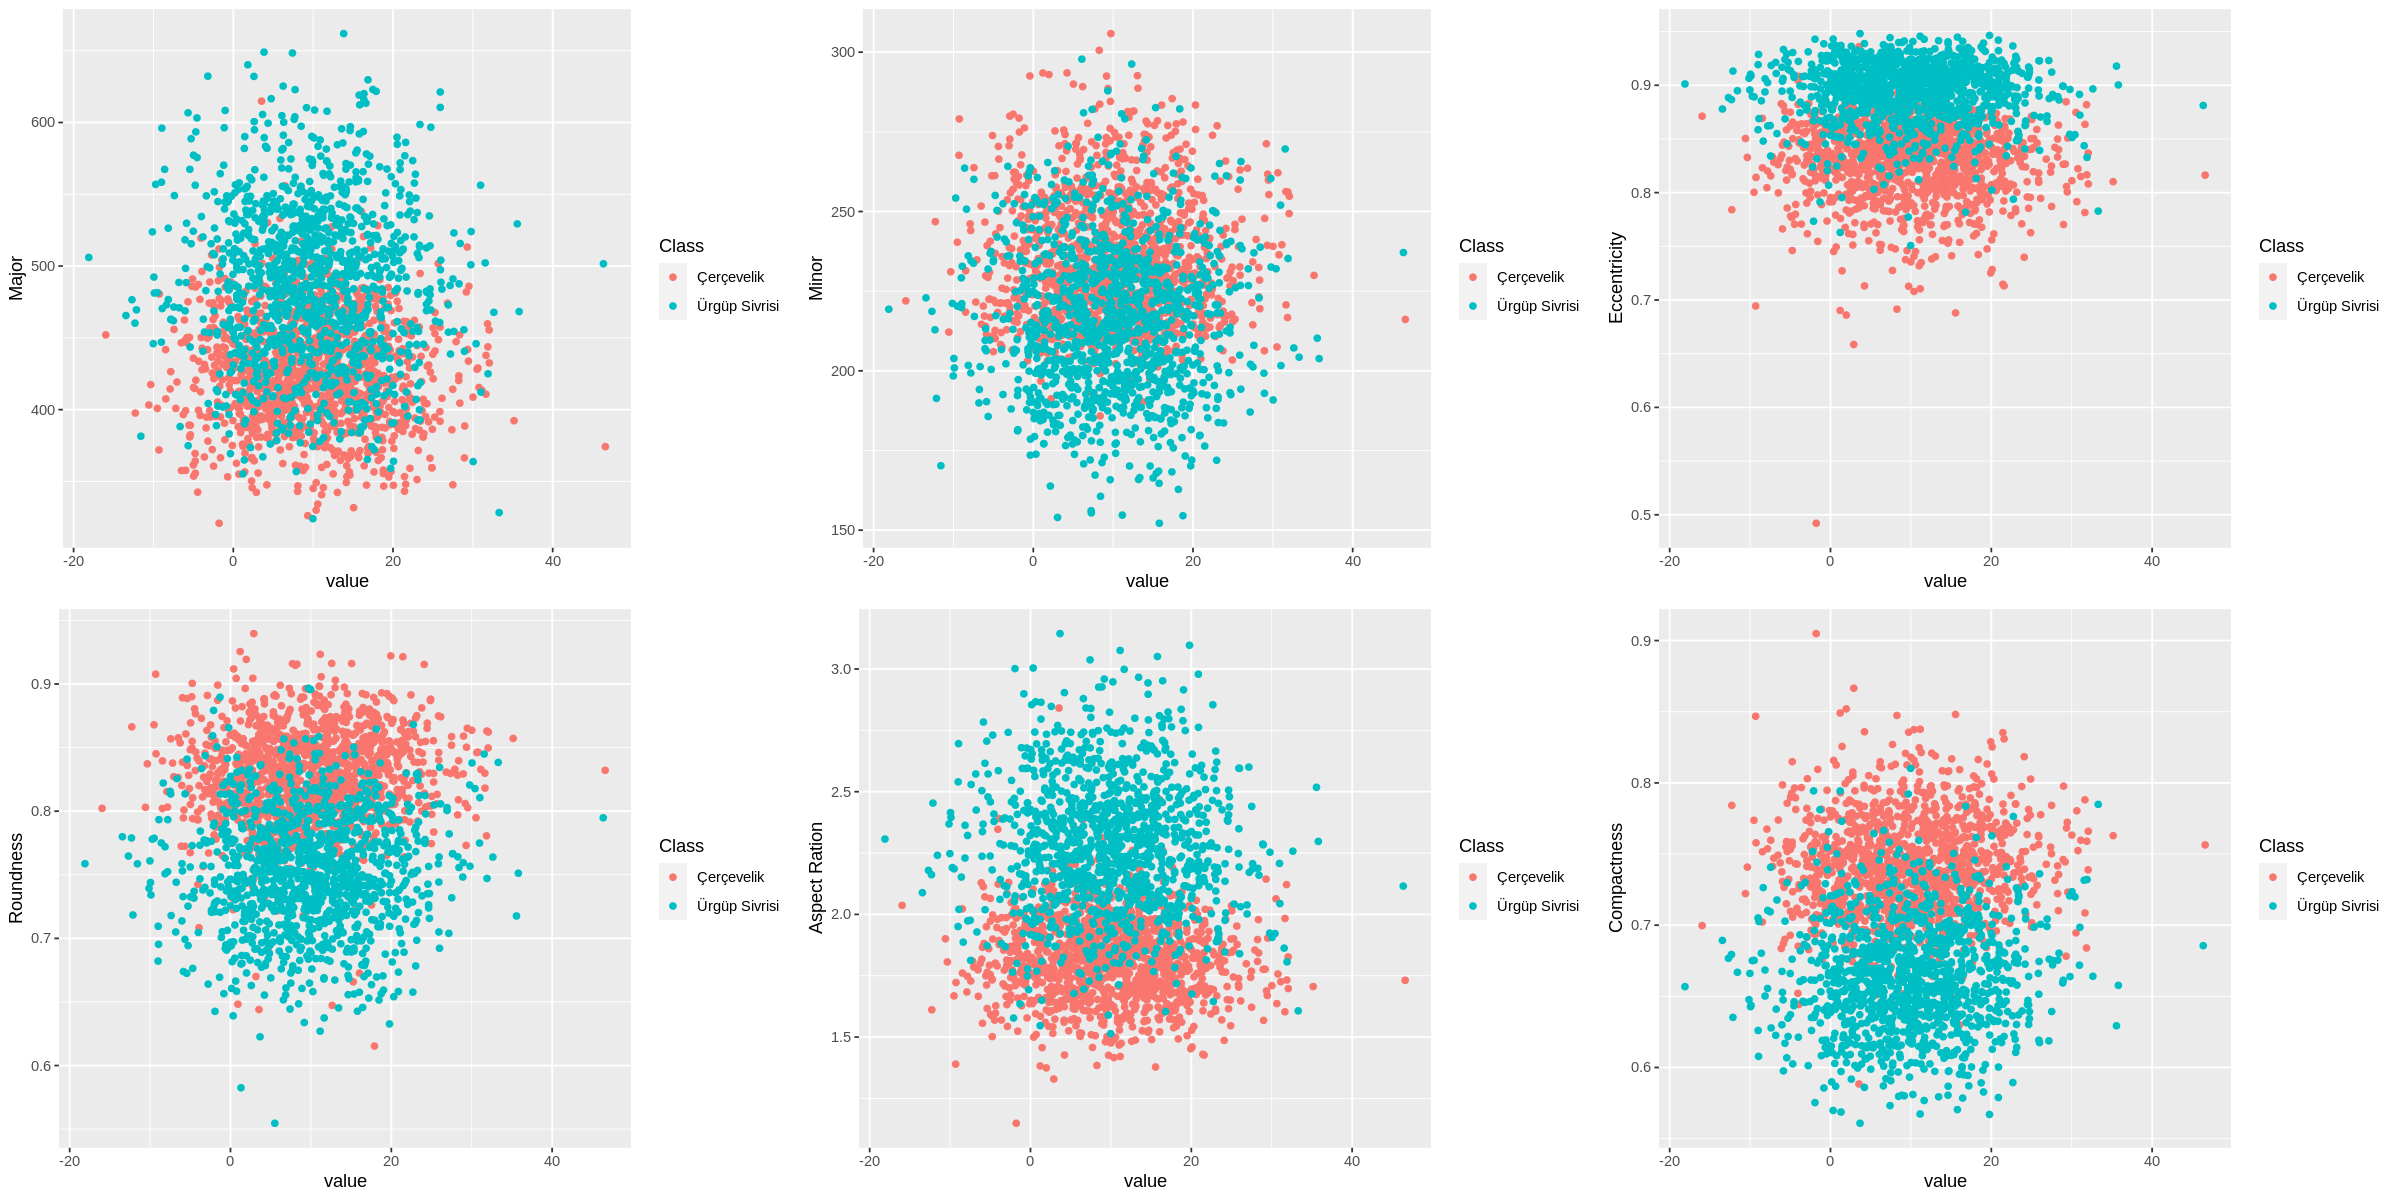

In [21]:
#From the plot we decide to choose 6 parameters Major And Minor Axis,Eccentricity, Roundness, Aspect_Ration, and Compactness
options(repr.plot.width = 20, repr.plot.height = 10)
Plot_Parameters <- plot_grid(plot_Major, plot_Minor, plot_Eccentricity, plot_Roundness, plot_Aspect_Ration, plot_Compactness, ncol = 3)

Plot_Parameters

In [22]:
#Finish